# DETECTION DE FRAUDE AUX PAIEMENTS EN LIGNE

**Pour identifier la fraude aux paiements en ligne grâce à l’apprentissage automatique, nous devons former un modèle d’apprentissage automatique pour classer les paiements frauduleux et non frauduleux.**

Mon dataSet contient des informations historiques sur les transactions frauduleuses qui peuvent être utilisées pour détecter la fraude dans les paiements en ligne.

In [ ]:
import numpy as np
import pandas as pd
import sqlite3


In [ ]:
conn = sqlite3.connect('detections.db')
cur = conn.cursor()

### chargement du data_set

In [ ]:
# 2. Exécuter le script SQL
with open('detection.sql', 'r') as f:
    cur.executescript(f.read())

In [ ]:


# 3. Lire les résultats
dat = pd.read_sql('SELECT * FROM fraud_detections', conn)  # adaptez le nom de la table

# 4. Fermer
conn.close()

In [ ]:
dat

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14241,8,PAYMENT,35108.12,C1925841262,0.0,0.00,M828869162,0.0,0.0,0,0
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0,0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0,0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0,0


In [ ]:
data=pd.DataFrame(data=dat)

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Signification de chaque caracteristique du data_set

step - représente une unité de temps dans le monde réel. Dans ce cas, 1 pas correspond à 1 heure de temps. Total des étapes 744 (simulation de 31 jours).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT et TRANSFER.

amount - montant de la transaction en monnaie locale.

nameOrig - client qui a commencé la transaction

oldbalanceOrg - solde initial avant la transaction

newbalanceOrig - nouveau solde après la transaction.

nameDest - client qui est le destinataire de la transaction

oldbalanceDest - solde initial du destinataire avant la transaction. Notez qu'il n'y a pas d'informations pour les clients qui commencent par M (Merchants).

newbalanceDest - nouveau solde destinataire après la transaction. Notez qu'il n'y a pas d'information pour les clients qui commencent par M (Marchants).

isFraud - Il s'agit des transactions effectuées par les agents frauduleux dans le cadre de la simulation. Dans cet ensemble de données spécifique, le comportement frauduleux des agents vise à tirer profit de la prise de contrôle des comptes des clients et à essayer de vider les fonds en les transférant sur un autre compte, puis en les retirant du système.

isFlaggedFraud - Le modèle d'entreprise vise à contrôler les transferts massifs d'un compte à l'autre et à signaler les tentatives illégales. Dans cet ensemble de données, une tentative illégale est une tentative de transfert de plus de 200 000 euros en une seule transaction.


Les types de transactions:

    CASH_OUT : retrait de cash chez un marchant
    PAYMENT : payement chez un marchand
    CASH_IN : dépôt de cash chez un marchand
    TRANSFER : transaction à un client normal
    DEBIT : retrait d argent


### Voyons maintenant si ce jeu de données a des valeurs manquantes ou non:

In [ ]:
# Tableau des valeurs manquantes par colonne
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)


                Missing Values  Percentage
step                         0         0.0
type                         0         0.0
amount                       0         0.0
nameOrig                     0         0.0
oldbalanceOrg                0         0.0
newbalanceOrig               0         0.0
nameDest                     0         0.0
oldbalanceDest               0         0.0
newbalanceDest               0         0.0
isFraud                      0         0.0
isFlaggedFraud               0         0.0


<Axes: >

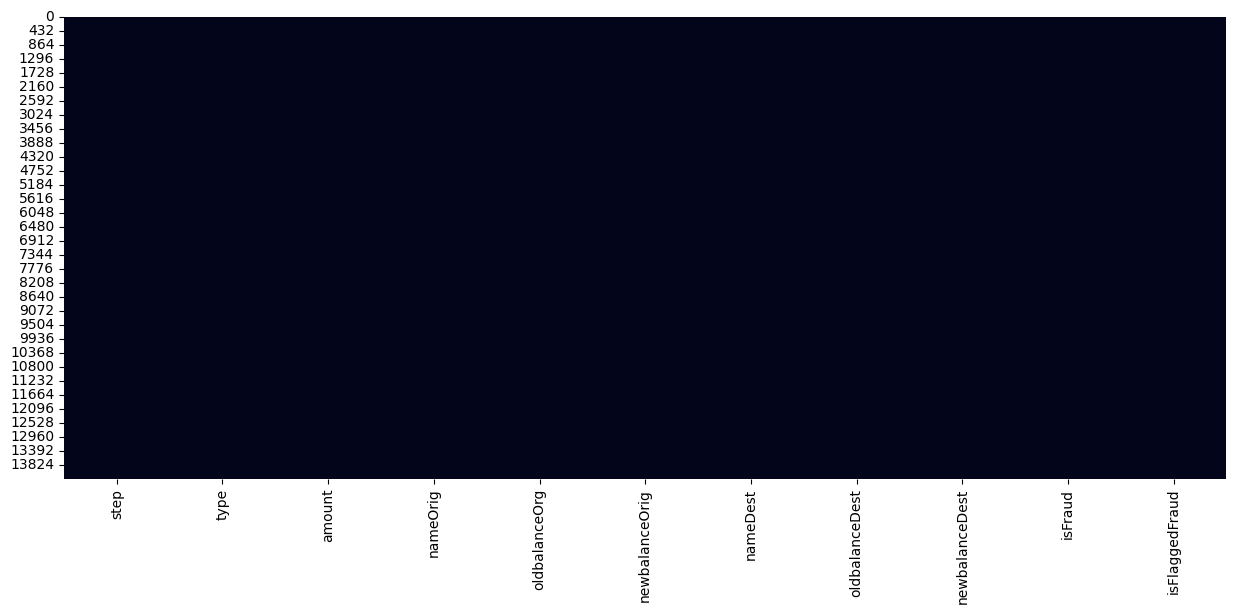

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.heatmap(data.isna(),cbar=False)


### Rendue visuel

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14246 non-null  int64  
 1   type            14246 non-null  object 
 2   amount          14246 non-null  float64
 3   nameOrig        14246 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  int64  
 10  isFlaggedFraud  14246 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.2+ MB


### Distribution des caracteristiques

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,14246.000000,1.424600e+04,1.424600e+04,1.424600e+04,1.424600e+04,1.424600e+04,14246.000000,14246.0
mean,5.036923,1.118877e+05,7.937369e+05,8.107136e+05,8.411336e+05,1.147629e+06,0.005475,0.0
std,2.463073,2.805248e+05,2.016693e+06,2.059984e+06,2.528174e+06,3.151706e+06,0.073794,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,2.000000,4.584905e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,6.000000,1.286530e+04,2.041500e+04,8.216325e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.218946e+05,1.384956e+05,1.294173e+05,2.641427e+05,2.775150e+05,0.000000,0.0
max,8.000000,1.000000e+07,1.293042e+07,1.301050e+07,2.093759e+07,2.533027e+07,1.000000,0.0


### L'encodage des differents caracteristiques categoriels en numeriques

In [ ]:
from sklearn.preprocessing import (LabelEncoder, OrdinalEncoder, OneHotEncoder,
                                    LabelBinarizer, MultiLabelBinarizer)

In [ ]:
# Label encoding
le = LabelEncoder()
data['type_le'] = le.fit_transform(data['type'])

# Label des Valeurs encodees

In [ ]:
data[['type']].type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
data["type_le"].unique()

array([3, 4, 1, 2, 0])

In [ ]:

# Réalisation de la table de contingence
table = pd.crosstab(data['type_le'], data['type'])
table

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
type_le,,,,,
0,2472,0,0,0,0
1,0,2054,0,0,0
2,0,0,413,0,0
3,0,0,0,7869,0
4,0,0,0,0,1438


# 0 = CASH_IN
# 1 = CASH_OUT
# 2 = DEBIT
# 3 = PAYEMENT
# 4 = TRANSFERT

In [ ]:
# Label encoding
le = LabelEncoder()
data['nameOrig_le'] = le.fit_transform(data['nameOrig'])

In [ ]:
# Label encoding
le = LabelEncoder()
data['nameDest_le'] = le.fit_transform(data['nameDest'])


# AFFECTATION DES ETIQUETS

In [ ]:
data["nameOrig"].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1827218030',
       'C1632817923', 'C1837637612'], dtype=object)

In [ ]:
data["nameOrig_le"].unique()

array([1655, 4937, 2221, ..., 6157, 4670, 6236])

In [ ]:
columns_supp=['nameOrig','nameDest','type']

In [ ]:
#suppression des variables pre_encodee
data=data.drop(columns=columns_supp)

In [ ]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_le,nameOrig_le,nameDest_le
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,3,1655,5579
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3,4937,5856
2,1,181.00,181.0,0.00,0.0,0.0,1,0,4,2221,1242
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,13048,1096
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3,7765,2506


### Imputation des caracterisques manquantes du data_set

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
# from sklearn.impute import IterativeImputer

# # Créer un imputer IterativeImputer avec une stratégie de 'mean'
# imputer = IterativeImputer(max_iter=10, random_state=0, sample_posterior=True)

# # Imputer les colonnes 'person_emp_length','loan_int_rate' de la DataFrame df
# data_imputed = pd.DataFrame(imputer.fit_transform(data[['oldbalanceOrg','newbalanceOrig','nameDest_le','oldbalanceDest','newbalanceDest']]),columns=['oldbalanceOrg_imputed','newbalanceOrig_imputed','nameDest_le_imputed','oldbalanceDest_imputed','newbalanceDest_imputed'])

# # Concaténer la DataFrame imputée avec la DataFrame originale
# data = pd.concat([data, data_imputed], axis=1)
# columns_imputed=['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']
# #suppression des variables pre_encodee
# data=data.drop(columns=columns_imputed)
# data.isnull().sum()

### Examinons maintenant la corrélation entre les caractéristiques des données avec la colonne 'isFraud_imputed' :

In [ ]:
# Vérifions la corrélation
correlation = data.corr()
correlation["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.133739
type_le           0.011214
nameOrig_le      -0.005329
oldbalanceOrg    -0.005359
newbalanceDest   -0.009828
oldbalanceDest   -0.018103
step             -0.024286
newbalanceOrig   -0.027849
nameDest_le      -0.064539
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

<Axes: >

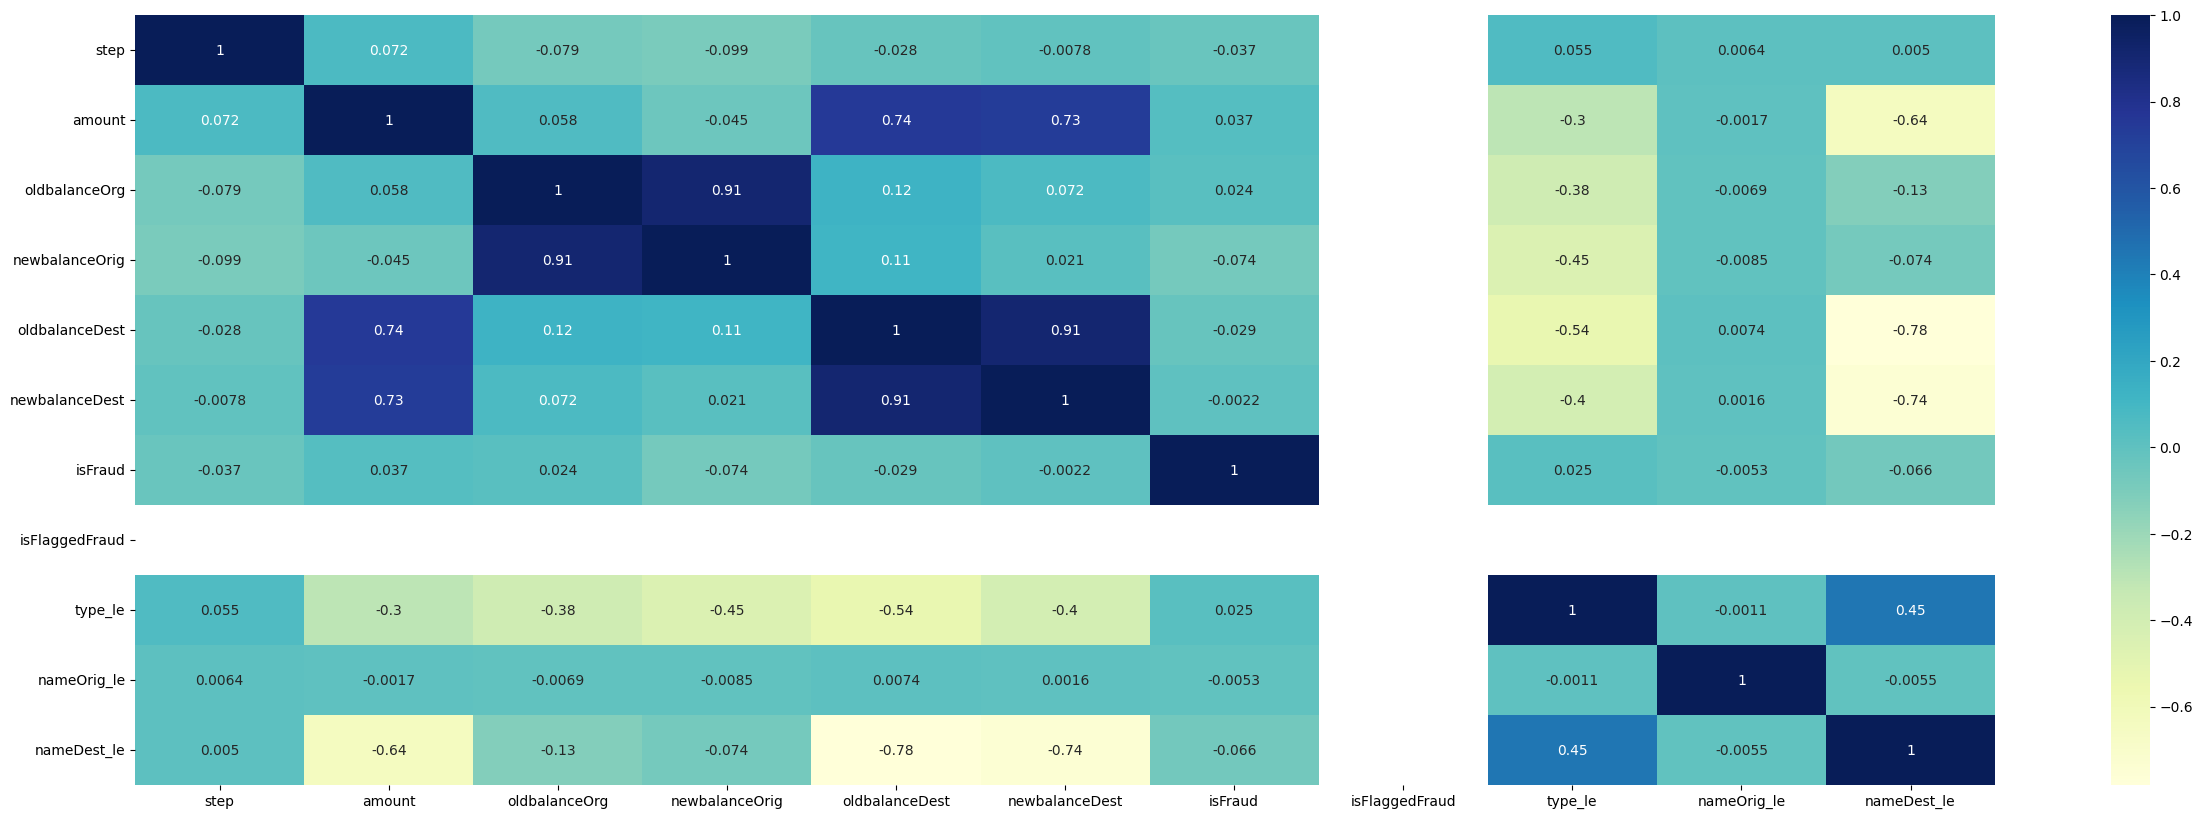

In [ ]:
plt.figure(figsize=(30, 10))
num=data.select_dtypes(include=[np.number])
sns.heatmap(num.corr(method='spearman'), cmap='YlGnBu',annot=True)
# plt.savefig("tototo.png")

In [ ]:
# Explorons les types de transactions
print(data.type_le.value_counts())

type_le
3    7869
0    2472
1    2054
4    1438
2     413
Name: count, dtype: int64


In [ ]:
type = data["type_le"].value_counts()
transactions = type.index
quantity = type.values

In [ ]:
# import plotly.express as px
# figure = px.pie(data,
#              values=quantity,
#              names=transactions,hole = 0.5,
#              title="Distribution des types de transaction")
# figure.show()

# encodage de isFraud

In [ ]:
# # Label encoding
# le = LabelEncoder()
# data['isFraud_le'] = le.fit_transform(data['isFraud'])

# Affectation des etiquets

In [ ]:

data[['isFraud']].head()


,isFraud
0,0
1,0
2,1
3,1
4,0


In [ ]:
print("Valeurs Unique")
print(data.isFraud .unique())



Valeurs Unique
[0 1]


In [ ]:
# # Réalisation de la table de contingence
# table = pd.crosstab(data['isFraud_imputed_le'], data['isFraud_imputed'])
# print(table)

# 0 = ISN'T FRAUD
# 1 = IS FRAUD

# Modèle de Detection de Fraude aux paiements en ligne

Entraînons maintenant un modèle de classification pour classer les transactions frauduleuses et non frauduleuses.

 Avant d'entraîner le modèle, divisons les données en ensembles d'entraînement et de test :

In [ ]:
# Division des données
from sklearn.model_selection import train_test_split
x = np.array(data[["type_le", "amount", "oldbalanceOrg","isFlaggedFraud"]])
y = np.array(data[["isFraud"]])


Entraînons maintenant le modèle :

In [ ]:
 # Entraînement du modèle
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(xtrain, ytrain)




DecisionTreeClassifier(random_state=42)

In [ ]:
# Afficher la précision de l'entraînement
print(f"Précision (Entraînement): {model.score(xtrain, ytrain):.4f}")

# Afficher la précision du test
print(f"Précision (Test): {model.score(xtest, ytest):.4f}")

Précision (Entraînement): 1.0000
Précision (Test): 0.9951


In [ ]:

data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})



In [ ]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_le,nameOrig_le,nameDest_le
0,1,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,0,3,1655,5579
1,1,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,0,3,4937,5856
2,1,181.00,181.0,0.00,0.0,0.0,Fraud,0,4,2221,1242
3,1,181.00,181.0,0.00,21182.0,0.0,Fraud,0,1,13048,1096
4,1,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,0,3,7765,2506
...,...,...,...,...,...,...,...,...,...,...,...
14241,8,35108.12,0.0,0.00,0.0,0.0,No Fraud,0,3,6853,8785
14242,8,20924.47,18265.0,0.00,0.0,0.0,No Fraud,0,3,3939,2817
14243,8,75244.54,38369.0,0.00,167.0,0.0,No Fraud,0,1,6157,249
14244,8,3074.36,10242.0,7167.64,0.0,0.0,No Fraud,0,3,4670,5672


In [ ]:
data["isFraud"]

0        No Fraud
1        No Fraud
2           Fraud
3           Fraud
4        No Fraud
           ...   
14241    No Fraud
14242    No Fraud
14243    No Fraud
14244    No Fraud
14245    No Fraud
Name: isFraud, Length: 14246, dtype: object

Classifions maintenant si une transaction est une fraude ou non en introduisant une transaction dans le modèle

In [ ]:
# prédiction
#features = [type_le, amount, oldbalanceOrg_imputed,isFlaggedFraud_imputed ]
features = np.array([[1,181.00,181.0,0]])
print(model.predict(features))

[1]


**C'est ainsi que nous pouvons détecter la fraude aux paiements en ligne avec l'apprentissage automatique en utilisant Python. La détection des fraudes au paiement en ligne est l'une des applications de la science des données en finance.**

### Appliquons le Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
#  Appliquer le bagging avec un classificateur RandomForest
base_classifier = RandomForestClassifier(n_estimators=100, random_state=4)
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=50, random_state=42)

# Entraînement du modèle
bagging_classifier.fit(xtrain, ytrain)

#  Évaluer les performances du modèle
y_pred = bagging_classifier.predict(xtest)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model= BaggingClassifier(estimator= RandomForestClassifier(),n_estimators=100)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9957894736842106

### Appliquons le Voting

In [ ]:

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [ ]:
# Créer les modèles individuels
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = SVC(probability=True, random_state=42)  # SVC avec probabilité activée pour le vote
model3 = LogisticRegression(random_state=42)

# Créer le VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('rf', model1),
    ('svc', model2),
    ('lr', model3)],
    voting='soft'  # Utiliser 'soft' pour voter basé sur les probabilités
)

for model in(model1,model2,model3,voting_clf):
    model.fit(xtrain, ytrain)
    print(model.__class__.__name__,model.score(xtest, ytest))

# # Faire des prédictions
# y_pred = voting_clf.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier 0.9964912280701754


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.9929824561403509
LogisticRegression 0.9936842105263158


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier 0.9936842105263158


### Appliquons le Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#  Appliquer le Boosting avec un AdaBoostclassificateur
model = GradientBoostingClassifier(n_estimators=100, random_state=4)

model.fit(xtrain,ytrain)
model.score(xtest,ytest)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9971929824561403

# XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
modelXgb = XGBClassifier(n_estimators=100, random_state=42)
modelXgb.fit(xtrain,ytrain)
modelXgb.score(xtest,ytest)

0.9971929824561403

### Appliquons le Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
# Créer les modèles individuels
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = SVC(probability=True, random_state=42)  # SVC avec probabilité activée pour le vote
model3 = LogisticRegression(random_state=42)


model4 = StackingClassifier(estimators=[
    ('rf', model1),
    ('svc', model2),
    ('lr', model3)], final_estimator= KNeighborsClassifier
)

model.fit(xtrain,ytrain)
model.score(xtest,ytest)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9971929824561403

### Conclusion: nous remarquons que la methode de Bagging est plus performantes que les autres methodes.